In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LassoCV, LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report, 
ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, PredictionErrorDisplay)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.utils.discovery import all_displays
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.svm import SVC

from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from scipy.stats import fisher_exact

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier.threshold import discrimination_threshold

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import json

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(8090)

In [3]:
data = pd.read_csv('/Users/michael/Documents/MA Stats/STAT 8090/final dataset/full dataset.csv')

data.head()

,Symbol,Company_Name,Exchange,Orig_Range_Low,Orig_Range_High,Price,Shares,Offer_Amount,ipo_date,IPO_Year,...,plustwo_volume_pct,plusthree_change_pct,plusthree_volume_pct,plus90_change_pct,plus90_volume_pct,plus180_change_pct,plus180_volume_pct,d1_d180,d1_pop,d1_d180_pre_price
0,LXEO,Lexeo Therapeutics,Nasdaq,13.0,15.0,11.0,9090910,100000010,11/3/23,2023,...,0.013554,-0.005607,0.027481,-0.007088,0.008493,-0.010459,0.008693,1,0,1
1,MNR,Mach Resources,NYSE,19.0,21.0,19.0,10000000,190000000,10/25/23,2023,...,0.014016,-0.060652,0.014147,0.015936,0.004482,-0.021266,0.007779,1,0,1
2,BIRK,Birkenstock,NYSE,44.0,49.0,46.0,32258064,1483870944,10/11/23,2023,...,0.000001,0.037633,0.094204,-0.012492,0.017129,-0.002016,0.012965,1,0,0
3,KVYO,Klaviyo,NYSE,25.0,27.0,30.0,19200000,576000000,9/20/23,2023,...,0.093943,0.007383,0.130651,-0.048713,0.053359,0.022050,0.084599,0,1,1
4,CART,Maplebear,Nasdaq,26.0,28.0,30.0,22000000,660000000,9/19/23,2023,...,0.330195,-0.049430,0.202700,0.014551,0.063364,0.039052,0.193695,1,1,1


In [4]:
# validation = pd.read_csv('/Users/michael/Documents/MA Stats/STAT 8090/final dataset/validation_set.csv')

In [5]:
with open('/Users/michael/Documents/MA Stats/STAT 8090/Code Files/exchange.json','r') as f:
    exchange = json.load(f)

In [6]:
with open('/Users/michael/Documents/MA Stats/STAT 8090/Code Files/sector.json','r') as f:
    sector = json.load(f)

In [7]:
with open('/Users/michael/Documents/MA Stats/STAT 8090/Code Files/industry.json','r') as f:
    industry = json.load(f)

In [8]:
data['Exchange'] = data['Exchange'].replace(exchange)
data['Sector'] = data['Sector'].replace(sector)
data['Industry'] = data['Industry'].replace(industry)

In [9]:
# validation['Exchange'] = validation['Exchange'].replace(exchange)
# validation['Sector'] = validation['Sector'].replace(sector)
# validation['Industry'] = validation['Industry'].replace(industry)

In [10]:
data = data.drop(columns=['Symbol', 'Company_Name', 'ipo_date', 'Country_HQ', 'Pitchbook_Number',
                          'Orig_Range_Low', 'Orig_Range_High', 'Year_Founded', 'Raised_to_IPO',
                          'ipo_date_open','ipo_date_close','ipo_date_volume','plusone_open','plusone_close',
                          'plusone_volume','plustwo_open','plustwo_close','plustwo_volume','plusthree_open','plusthree_close',
                          'plusthree_volume','plus90_open','plus90_close','plus90_volume','plus180_open','plus180_close',
                          'plus180_volume','day_one_bump','ipo_date_change_pct','ipo_date_volume_pct','plusone_change_pct',
                          'plusone_volume_pct','plustwo_change_pct','plustwo_volume_pct','plusthree_change_pct',
                          'plusthree_volume_pct','plus90_change_pct','plus90_volume_pct','plus180_change_pct','plus180_volume_pct',
                          'd1_pop', 'd1_d180_pre_price'])

In [11]:
# validation = validation.drop(columns=['Symbol', 'Company_Name', 'ipo_date', 'Country_HQ', 'Pitchbook_Number',
#                           'Orig_Range_Low', 'Orig_Range_High', 'Year_Founded', 'Raised_to_IPO',
#                           'ipo_date_open','ipo_date_close','ipo_date_volume','plusone_open','plusone_close',
#                           'plusone_volume','plustwo_open','plustwo_close','plustwo_volume','plusthree_open','plusthree_close',
#                           'plusthree_volume','plus90_open','plus90_close','plus90_volume','plus180_open','plus180_close',
#                           'plus180_volume','day_one_bump','ipo_date_change_pct','ipo_date_volume_pct','plusone_change_pct',
#                           'plusone_volume_pct','plustwo_change_pct','plustwo_volume_pct','plusthree_change_pct',
#                           'plusthree_volume_pct','plus90_change_pct','plus90_volume_pct','plus180_change_pct','plus180_volume_pct',
#                           'd1_pop', 'd1_d180_pre_price'])

In [12]:
data.head()

,Exchange,Price,Shares,Offer_Amount,IPO_Year,Years_to_IPO,Price_Low_Delta,Price_High_Delta,Sector,Industry,...,market_min5,market_min4,market_min3,market_min2,market_min1,market_min0,sent_negative,sent_neutral,sent_positive,d1_d180
0,1,11.0,9090910,100000010,2023,5,-0.153846,-0.266667,5,65,...,13463.77810,14033.09100,13739.49652,13585.84000,13199.42727,13913.16048,0,0,0,1
1,0,19.0,10000000,190000000,2023,8,0.000000,-0.095238,3,43,...,15230.52727,15560.37143,16104.99500,15980.94783,15786.03000,15149.39545,0,0,0,1
2,0,46.0,32258064,1483870944,2023,249,0.045455,-0.061224,1,13,...,15230.52727,15560.37143,16104.99500,15980.94783,15786.03000,15149.39545,2,1,0,1
3,0,30.0,19200000,576000000,2023,11,0.200000,0.111111,8,136,...,15507.15789,15230.52727,15560.37143,16104.99500,15980.94783,15786.03000,1,0,0,0
4,1,30.0,22000000,660000000,2023,11,0.153846,0.071429,1,17,...,12073.46421,12446.53000,13463.77810,14033.09100,13739.49652,13585.84000,1,1,0,1


In [13]:
X = data.drop(columns=['d1_d180'])
y = data['d1_d180']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8090)

unique_values = set(X_train['Industry'])

# Check if at least one sample from each unique value is present in the training set
for value in unique_values:
    if value not in X_train['Industry'].unique():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8090)
        break

In [14]:
# X_valid = validation.drop(columns=['d1_d180'])
# y_valid = validation['d1_d180']

## Full Model

### Support Vector Machine

In [15]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('sampler', RandomUnderSampler()),
    ('classifier', SVC(gamma='auto', probability=True))
])

In [16]:
param_grid = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'classifier__degree': [1,3,5,7],
    'classifier__decision_function_shape': ['ovo', 'ovr'] 
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.3s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time= 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('classifier',
                                        SVC(gamma='auto', probability=True))]),
             param_grid={'classifier__decision_function_shape': ['ovo', 'ovr'],
                         'classifier__degree': [1, 3, 5, 7],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']},
             verbose=2)

In [17]:
ranks = pd.DataFrame(
    {
        'Model': grid_search.cv_results_['params'],
        'Mean Test Score': grid_search.cv_results_['mean_test_score'],
        'Std Test Score': grid_search.cv_results_['std_test_score'],
        'Rank': grid_search.cv_results_['rank_test_score']
    }
)

pd.concat([ranks.drop(['Model'], axis=1), ranks['Model'].apply(pd.Series)], axis=1).sort_values(by="Rank")

,Mean Test Score,Std Test Score,Rank,classifier__decision_function_shape,classifier__degree,classifier__kernel
2,0.622929,0.072689,1,ovo,1,rbf
1,0.615556,0.070464,2,ovo,1,poly
21,0.615522,0.062957,3,ovr,1,poly
32,0.611785,0.068505,4,ovr,5,rbf
7,0.609966,0.061169,5,ovo,3,rbf
26,0.608283,0.069107,6,ovr,3,poly
23,0.606296,0.071646,7,ovr,1,sigmoid
27,0.606229,0.070556,8,ovr,3,rbf
6,0.604579,0.060929,9,ovo,3,poly
12,0.604478,0.061201,10,ovo,5,rbf


In [18]:
best_estimator = grid_search.best_estimator_

print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('classifier',
                 SVC(decision_function_shape='ovo', degree=1, gamma='auto',
                     probability=True))])


In [19]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[63, 74],
       [17, 78]])

In [21]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

odds_ratio, p_value = fisher_exact([[TP, FP], [FN, TN]])

log_odds_ratio = np.log(odds_ratio)

std_error_log_odds_ratio = np.sqrt(1/TP + 1/FP + 1/FN + 1/TN)

z_score = 1.96  # 95% confidence interval
lower_bound = log_odds_ratio - z_score * std_error_log_odds_ratio
upper_bound = log_odds_ratio + z_score * std_error_log_odds_ratio


ci_lower = np.exp(lower_bound)
ci_upper = np.exp(upper_bound)

print("95% Confidence Interval for Odds Ratio:", (ci_lower, ci_upper))
print("p-value for Odds Ratio:", p_value)

95% Confidence Interval for Odds Ratio: (2.0950409637733096, 7.283103857114398)
p-value for Odds Ratio: 1.0836103546481793e-05


In [22]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.46      0.58       137
           1       0.51      0.82      0.63        95

    accuracy                           0.61       232
   macro avg       0.65      0.64      0.61       232
weighted avg       0.68      0.61      0.60       232



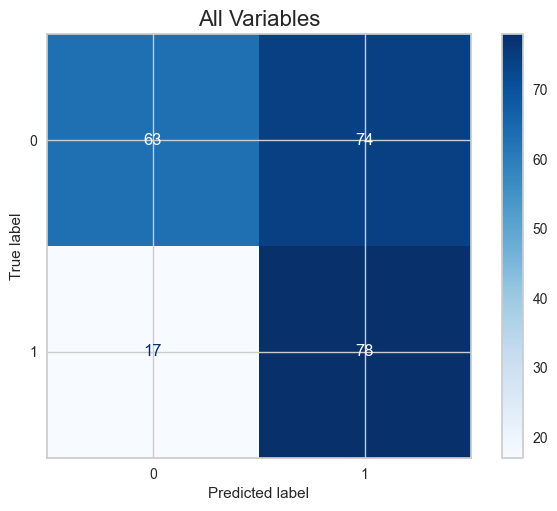

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_estimator.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('All Variables', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/cm_svm_full_180.png', dpi=300, bbox_inches="tight")
plt.show()

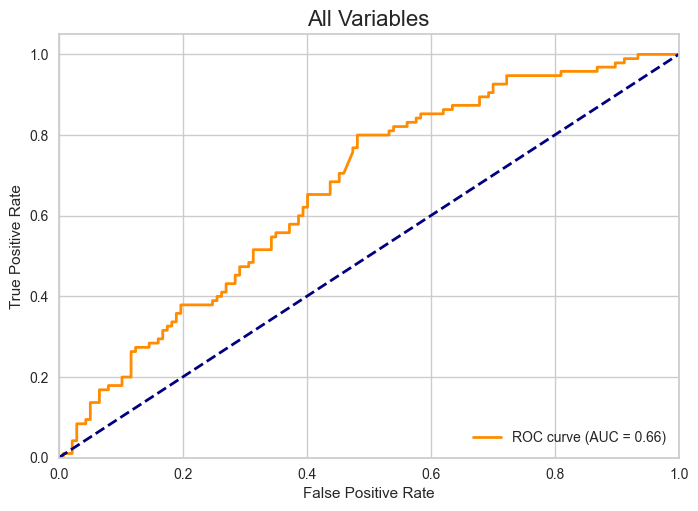

In [24]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Variables', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/roc_svm_full_180.png', dpi=300, bbox_inches="tight")
plt.show()

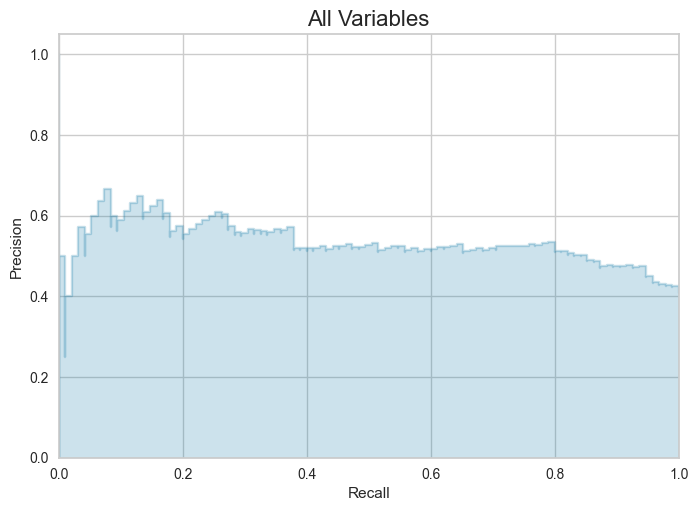

In [25]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('All Variables', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/prc_svm_full_180.png', dpi=300, bbox_inches="tight")
plt.show()

In [26]:
# train_sizes, train_scores, test_scores = learning_curve(best_estimator, X, y)
# display = LearningCurveDisplay(train_sizes=train_sizes,
#                                train_scores=train_scores, test_scores=test_scores, score_name="accuracy")
# display.plot()
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Learning Curve')
# plt.show()

In [27]:
# scaler = StandardScaler()

# X_test_std = scaler.fit_transform(X_test)
# # Yellowbrick plot
# visualizer = DiscriminationThreshold(best_estimator)

# visualizer.fit(X_test_std, y_test)
# visualizer.show()

In [28]:
## alt. Yellowbrick model
#discrimination_threshold(best_estimator, X_test_std, y_test)

## Reduced Models

Lasso Regression is used to build the reduced model, with fewer predictor variables. This model will compared to the full model. 

### Lasso Regression and Decision Tree

In [29]:
lasso_decision_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ('feature_selection', SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'))), 
    ('classifier', SVC(gamma='auto', probability=True))
])

In [30]:
param_grid = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'classifier__degree': [1,3,5,7],
    'classifier__decision_function_shape': ['ovo', 'ovr'] 
}

grid_search = GridSearchCV(estimator=lasso_decision_tree, param_grid=param_grid, cv=10, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.2s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time= 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                                                     solver='liblinear'))),
                                       ('classifier',
                                        SVC(gamma='auto', probability=True))]),
             param_grid={'classifier__decision_function_shape': ['ovo', 'ovr'],
                         'classifier__degree': [1, 3, 5, 7],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']},
             verbose=2)

In [31]:
best_estimator = grid_search.best_estimator_

print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'))),
                ('classifier',
                 SVC(gamma='auto', kernel='poly', probability=True))])


In [32]:
ranks = pd.DataFrame(
    {
        'Model': grid_search.cv_results_['params'],
        'Mean Test Score': grid_search.cv_results_['mean_test_score'],
        'Std Test Score': grid_search.cv_results_['std_test_score'],
        'Rank': grid_search.cv_results_['rank_test_score']
    }
)

pd.concat([ranks.drop(['Model'], axis=1), ranks['Model'].apply(pd.Series)], axis=1).sort_values(by="Rank")

,Mean Test Score,Std Test Score,Rank,classifier__decision_function_shape,classifier__degree,classifier__kernel
26,0.613737,0.065552,1,ovr,3,poly
33,0.613704,0.078166,2,ovr,5,sigmoid
2,0.610034,0.050873,3,ovo,1,rbf
21,0.606364,0.063049,4,ovr,1,poly
28,0.604613,0.074333,5,ovr,3,sigmoid
13,0.604512,0.073680,6,ovo,5,sigmoid
1,0.604512,0.063695,7,ovo,1,poly
0,0.604444,0.063630,8,ovo,1,linear
15,0.602694,0.045926,9,ovo,7,linear
18,0.600842,0.073492,10,ovo,7,sigmoid


In [33]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[80, 57],
       [33, 62]])

In [35]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

odds_ratio, p_value = fisher_exact([[TP, FP], [FN, TN]])

log_odds_ratio = np.log(odds_ratio)

std_error_log_odds_ratio = np.sqrt(1/TP + 1/FP + 1/FN + 1/TN)

z_score = 1.96  # 95% confidence interval
lower_bound = log_odds_ratio - z_score * std_error_log_odds_ratio
upper_bound = log_odds_ratio + z_score * std_error_log_odds_ratio


ci_lower = np.exp(lower_bound)
ci_upper = np.exp(upper_bound)

print("95% Confidence Interval for Odds Ratio:", (ci_lower, ci_upper))
print("p-value for Odds Ratio:", p_value)

95% Confidence Interval for Odds Ratio: (1.5335392440474418, 4.534097633230572)
p-value for Odds Ratio: 0.0004970600308082416


In [36]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       137
           1       0.52      0.65      0.58        95

    accuracy                           0.61       232
   macro avg       0.61      0.62      0.61       232
weighted avg       0.63      0.61      0.62       232



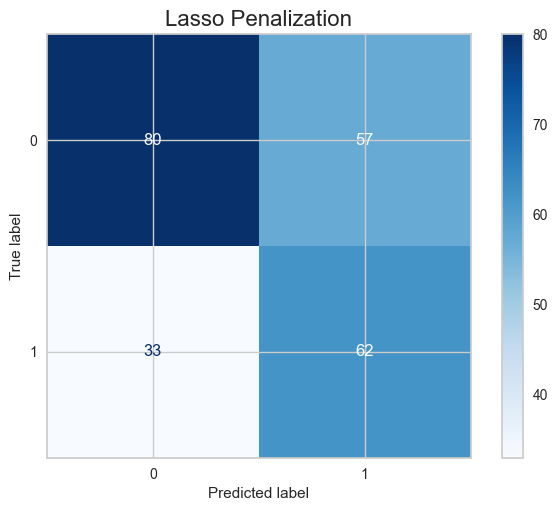

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_estimator.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Lasso Penalization', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/cm_svm_red1_180.png', dpi=300, bbox_inches="tight")
plt.show()

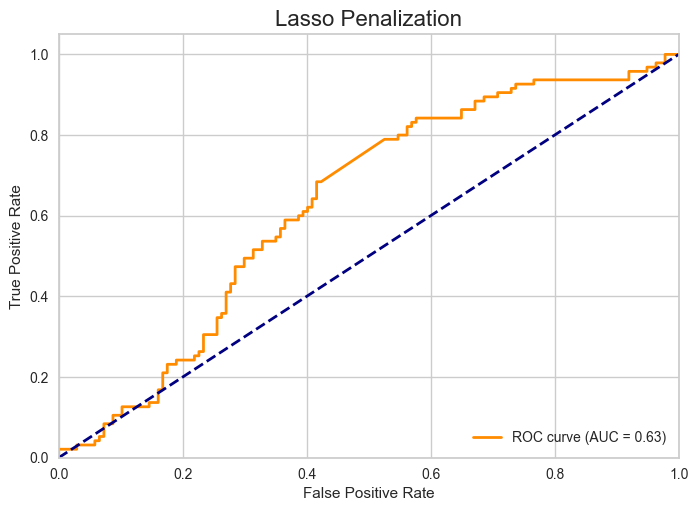

In [38]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lasso Penalization', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/roc_svm_red1_180.png', dpi=300, bbox_inches="tight")
plt.show()

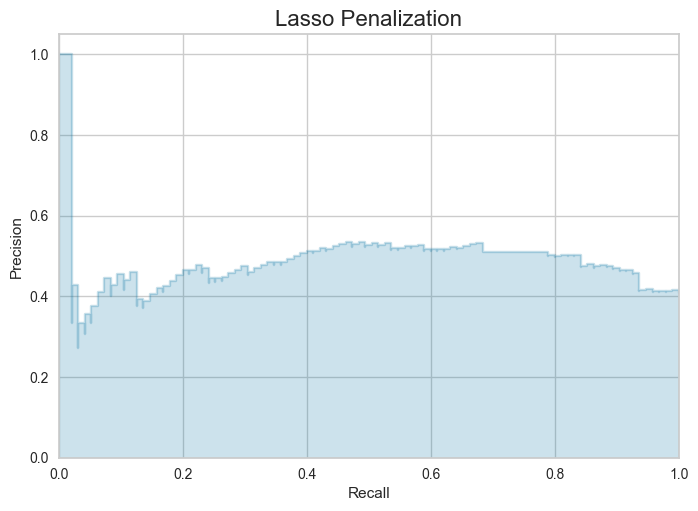

In [39]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Lasso Penalization', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/prc_svm_red1_180.png', dpi=300, bbox_inches="tight")
plt.show()

In [40]:
# train_sizes, train_scores, test_scores = learning_curve(best_estimator, X, y)
# display = LearningCurveDisplay(train_sizes=train_sizes,
#                                train_scores=train_scores, test_scores=test_scores, score_name="accuracy")
# display.plot()
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Learning Curve')
# plt.show()

## Feature Importance Models and Base Line Models

In [41]:
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [42]:
fi = feature_importance[feature_importance['importance'] >= 0.01]
fi = fi.index.tolist()

In [43]:
fi_data = X[fi]

In [44]:
fi_data.head()

,raise_to_ipo_ratio,Years_to_IPO,Price_Low_Delta,Price,Offer_Amount,multi_round_investors,90_Trailing_IPO_sub95,Price_High_Delta,Shares,market_min0,...,retail_sales_min2,inflation_min1,unrate_min6,inflation_min5,m2_min2,number_of_bookrunners,Sector,inflation_min6,retail_sales_min5,retail_sales_min4
0,0.337223,5,-0.153846,11.0,100000010,16,31,-0.266667,9090910,13913.16048,...,612633,307.531,3.7,304.003,20710.1,5,5,303.365,600736,603792
1,1.000000,8,0.000000,19.0,190000000,5,34,-0.095238,10000000,15149.39545,...,608386,307.288,3.4,303.365,20763.4,5,3,303.032,599958,600736
2,2.087695,249,0.045455,46.0,1483870944,3,36,-0.061224,32258064,15149.39545,...,608386,307.288,3.4,303.365,20763.4,11,1,303.032,599958,600736
3,0.514286,11,0.200000,30.0,576000000,30,29,0.111111,19200000,15786.03000,...,603792,306.187,3.5,303.032,20789.1,8,8,301.744,596809,599958
4,0.212219,11,0.153846,30.0,660000000,75,28,0.071429,22000000,13585.84000,...,603792,306.187,3.5,303.032,20789.1,5,1,301.744,596809,599958


In [45]:
X_train, X_test, y_train, y_test = train_test_split(fi_data, y, test_size=0.3, random_state=8090)

unique_values = set(X_train['Industry'])

# Check if at least one sample from each unique value is present in the training set
for value in unique_values:
    if value not in X_train['Industry'].unique():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8090)
        break

In [46]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('sampler', RandomUnderSampler()),
    ('classifier', SVC(gamma='auto', probability=True))
])

In [47]:
param_grid = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'classifier__degree': [1,3,5,7],
    'classifier__decision_function_shape': ['ovo', 'ovr'] 
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__decision_function_shape=ovo, classifier__degree=1, classifier__kernel=linear; total time= 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('classifier',
                                        SVC(gamma='auto', probability=True))]),
             param_grid={'classifier__decision_function_shape': ['ovo', 'ovr'],
                         'classifier__degree': [1, 3, 5, 7],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']},
             verbose=2)

In [48]:
ranks = pd.DataFrame(
    {
        'Model': grid_search.cv_results_['params'],
        'Mean Test Score': grid_search.cv_results_['mean_test_score'],
        'Std Test Score': grid_search.cv_results_['std_test_score'],
        'Rank': grid_search.cv_results_['rank_test_score']
    }
)

pd.concat([ranks.drop(['Model'], axis=1), ranks['Model'].apply(pd.Series)], axis=1).sort_values(by="Rank")

,Mean Test Score,Std Test Score,Rank,classifier__decision_function_shape,classifier__degree,classifier__kernel
37,0.645152,0.072756,1,ovr,7,rbf
12,0.639697,0.076071,2,ovo,5,rbf
32,0.639697,0.069966,3,ovr,5,rbf
7,0.637845,0.070451,4,ovo,3,rbf
17,0.632222,0.074389,5,ovo,7,rbf
27,0.630370,0.061571,6,ovr,3,rbf
2,0.624848,0.074994,7,ovo,1,rbf
10,0.623064,0.077779,8,ovo,5,linear
20,0.621212,0.069929,9,ovr,1,linear
0,0.621145,0.070896,10,ovo,1,linear


In [49]:
best_estimator = grid_search.best_estimator_

print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('classifier', SVC(degree=7, gamma='auto', probability=True))])


In [50]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[63, 74],
       [16, 79]])

In [52]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

odds_ratio, p_value = fisher_exact([[TP, FP], [FN, TN]])

log_odds_ratio = np.log(odds_ratio)

std_error_log_odds_ratio = np.sqrt(1/TP + 1/FP + 1/FN + 1/TN)

z_score = 1.96  # 95% confidence interval
lower_bound = log_odds_ratio - z_score * std_error_log_odds_ratio
upper_bound = log_odds_ratio + z_score * std_error_log_odds_ratio


ci_lower = np.exp(lower_bound)
ci_upper = np.exp(upper_bound)

print("95% Confidence Interval for Odds Ratio:", (ci_lower, ci_upper))
print("p-value for Odds Ratio:", p_value)

95% Confidence Interval for Odds Ratio: (2.230430200831795, 7.922153257262122)
p-value for Odds Ratio: 3.0297595958305927e-06


In [53]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       137
           1       0.52      0.83      0.64        95

    accuracy                           0.61       232
   macro avg       0.66      0.65      0.61       232
weighted avg       0.68      0.61      0.61       232



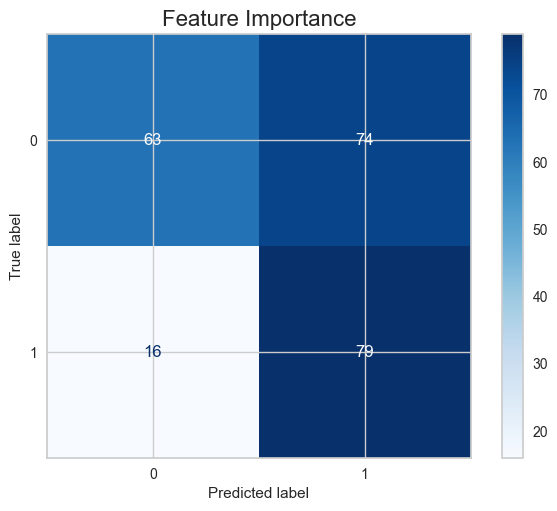

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_estimator.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Feature Importance', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/cm_svm_fi_180.png', dpi=600, bbox_inches="tight")
plt.show()

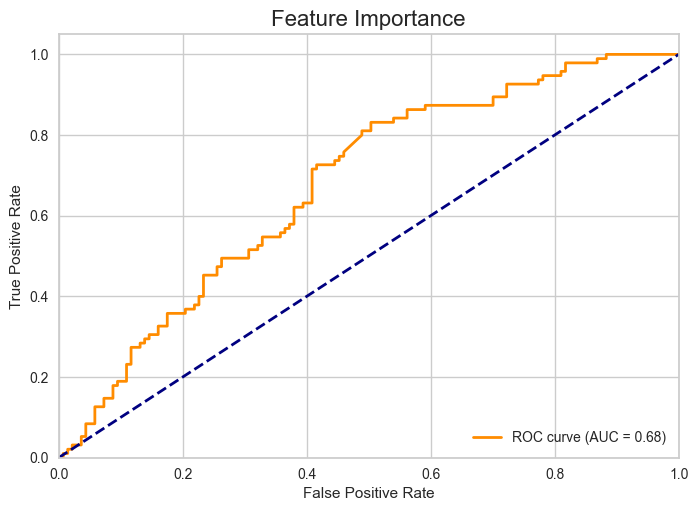

In [55]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feature Importance', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/roc_svm_fi_180.png', dpi=300, bbox_inches="tight")
plt.show()

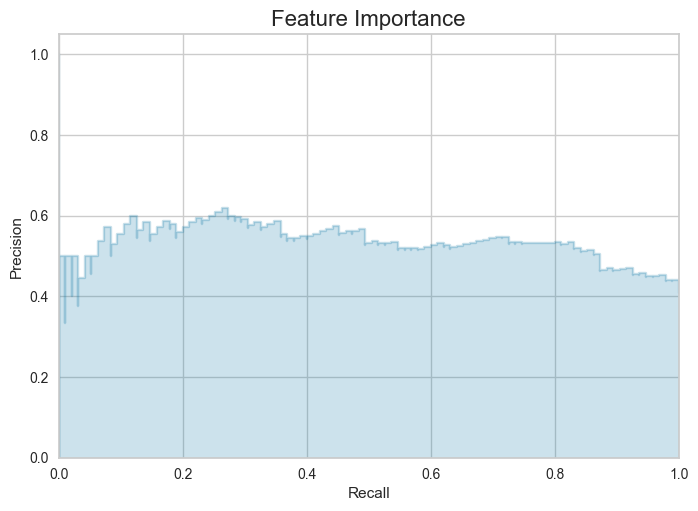

In [56]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Feature Importance', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/prc_svm_fi_180.png', dpi=300, bbox_inches="tight")
plt.show()

---
### End of Notebook